In [1]:
import json 
import ast

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import numpy.random as npr
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas import *
from numpy.random import randn
from pylab import *
import scipy.stats as sps
import warnings
warnings.simplefilter('ignore')
import matplotlib.path as mpath 
import matplotlib.patches as mpatches 
import matplotlib.pyplot as plt 


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
#warnings.filterwarnings("ignore")
#warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)
#warnings.filterwarnings(action='once')

from sklearn.utils.testing import ignore_warnings

In [3]:
df = pd.read_json (r'persons.json')
print (df[0:1])

                                             persons
0  {'age': 30, 'gender': 'MALE', 'skills': ['веде...


In [4]:
df=pd.DataFrame(df['persons'].values.tolist())

In [5]:
df

,age,education,fromProfession,gender,skills,success,toProfession
0,30,VOCATIONAL,ДИАГНОСТ,MALE,"[ведение и расширение клиентской базы, контрол...",True,СИСТЕМНЫЙ АНАЛИТИК
1,25,HIGH,ЮРИСКОНСУЛЬТ,FEMALE,"[Техническая смекалка, Эффективное решение про...",False,БИЗНЕС-АНАЛИТИК
2,54,SECONDARY,НОТАРИУС,FEMALE,"[Развитие IT в компании, Самосознание, ведение...",False,IT-ИНЖЕНЕР
3,35,VOCATIONAL,АНАЛИТИК,MALE,"[Техническая смекалка, Эффективное принятие ре...",False,PYTHON РАЗРАБОТЧИК
4,52,VOCATIONAL,ТУРАГЕНТ,MALE,"[контроль отгрузки и доставки товара, Знание п...",True,PYTHON РАЗРАБОТЧИК
5,21,HIGH,ЛЕКТОР,MALE,"[Техническая смекалка, Самосознание, Знание ша...",True,PYTHON РАЗРАБОТЧИК
6,28,HIGH,СМЕТЧИК,FEMALE,"[Самосознание, Эффективное принятие решений, Р...",True,НАГРУЗОЧНЫЙ ТЕСТИРОВЩИК
7,27,HIGH,ЭКСКУРСОВОД,FEMALE,"[ведение и расширение клиентской базы, Эффекти...",True,IT-ИНЖЕНЕР
8,47,VOCATIONAL,СТАТИСТИК,MALE,"[Эффективное принятие решений, Самосознание, с...",False,FRONTEND DEVELOPER
9,51,HIGH,ПЕРЕВОДЧИК,MALE,"[Техническая смекалка, ведение и расширение кл...",False,JAVA DEVELOPER


In [6]:
profs =["Умение расставлять приоритеты", "Умение работать в команде", "Организационная осведомленность",
                "Эффективное решение проблем", "Самосознание", "Проактивность", "Способность оказывать влияние",
                "Эффективное принятие решений", "Способность к обучению", "Техническая смекалка", "опыт заключения торговых сделок",
                "навыки делового общения, ведения переговоров", "опыт работы на выставках, презентация продукции",
                "ведение и расширение клиентской базы", "составление и заключение договоров", "ведение первичной бухгалтерии",
                "контроль отгрузки и доставки товара", "уверенное владение ПК, знание 1С, Word, Excel",
                "Опыт управления IT-отделом (15 человек в подчинении)", "Управление бюджетом отдела",
                "Развитие IT в компании", "Автоматизация деятельности компании", "Руководство внутренними проектами",
                "Обеспечение информационной безопасности", "Подбор персонала и обучение", "анализ конкурентного окружения",
                "Знание PHP", "Практическое применение объектно-ориентированного программирования (ООП)",
                "Опыт работы с фреймворками для программистов (CMF)", "Знание шаблонных движков",
                "Опыт работы с базами данных (MySQL, PostgreSQL, Oracle), знание языка SQL",
                "Знание JavaScript, HTML+CSS", "Знание принципов построения и работы сайтов и серверов",
                "Знания технологий и языков в соответствующих областях: J2SE‚ J2EE, JPA, JAXB",
                "языки программирования: Java, С++, PHP‚ JavaScript, Phyton; XML‚ HTML; SQL, JPQL",
                "сертификаты: Oracle"]

In [7]:
for prof in profs:
    df[prof] = df['skills'].map(lambda s: prof in s)

In [8]:
df.head()

,age,education,fromProfession,gender,skills,success,toProfession,Умение расставлять приоритеты,Умение работать в команде,Организационная осведомленность,...,Знание PHP,Практическое применение объектно-ориентированного программирования (ООП),Опыт работы с фреймворками для программистов (CMF),Знание шаблонных движков,"Опыт работы с базами данных (MySQL, PostgreSQL, Oracle), знание языка SQL","Знание JavaScript, HTML+CSS",Знание принципов построения и работы сайтов и серверов,"Знания технологий и языков в соответствующих областях: J2SE‚ J2EE, JPA, JAXB","языки программирования: Java, С++, PHP‚ JavaScript, Phyton; XML‚ HTML; SQL, JPQL",сертификаты: Oracle
0,30,VOCATIONAL,ДИАГНОСТ,MALE,"[ведение и расширение клиентской базы, контрол...",True,СИСТЕМНЫЙ АНАЛИТИК,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,25,HIGH,ЮРИСКОНСУЛЬТ,FEMALE,"[Техническая смекалка, Эффективное решение про...",False,БИЗНЕС-АНАЛИТИК,True,False,False,...,True,False,True,False,False,True,False,False,False,False
2,54,SECONDARY,НОТАРИУС,FEMALE,"[Развитие IT в компании, Самосознание, ведение...",False,IT-ИНЖЕНЕР,False,False,True,...,False,True,False,False,True,True,False,False,False,False
3,35,VOCATIONAL,АНАЛИТИК,MALE,"[Техническая смекалка, Эффективное принятие ре...",False,PYTHON РАЗРАБОТЧИК,False,False,False,...,True,True,False,False,False,False,True,False,False,False
4,52,VOCATIONAL,ТУРАГЕНТ,MALE,"[контроль отгрузки и доставки товара, Знание п...",True,PYTHON РАЗРАБОТЧИК,False,False,False,...,False,False,True,False,False,False,True,False,False,False


In [9]:
df = df.drop(['skills'], axis=1)

In [10]:
for i in df.columns: # перебираем все столбцы
    if str(df[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

education
{'HIGH', 'VOCATIONAL', 'SECONDARY'}


fromProfession
{'КОРРЕКТОР', 'БУХГАЛТЕР', 'ЖУРНАЛИСТ', 'СТАТИСТИК', 'ПЕРЕВОДЧИК', 'АНАЛИТИК', 'КОПИРАЙТЕР', 'ШТУРМАН', 'ТУРАГЕНТ', 'ИСПЫТАТЕЛЬ', 'ДИАГНОСТ', 'ЮРИСКОНСУЛЬТ', 'НОТАРИУС', 'СМЕТЧИК', 'ЭКСКУРСОВОД', 'ЛЕКТОР'}


gender
{'FEMALE', 'MALE'}


toProfession
{'IT-ИНЖЕНЕР', 'QA-ИНЖЕНЕР', 'СИСТЕМНЫЙ АНАЛИТИК', 'JAVA DEVELOPER', 'ИНЖЕНЕР-ТЕСТИРОВЩИК', 'БИЗНЕС-АНАЛИТИК', 'PYTHON РАЗРАБОТЧИК', 'НАГРУЗОЧНЫЙ ТЕСТИРОВЩИК', 'FRONTEND DEVELOPER'}




In [11]:
gender=['FEMALE', 'MALE']
education=['HIGH', 'SECONDARY', 'VOCATIONAL']

In [12]:
categorical_columns = [c for c in df.columns if df[c].dtype.name == 'object']
numerical_columns   = [c for c in df.columns if df[c].dtype.name != 'object']
print (categorical_columns)

print ('---------------------------------')
print (numerical_columns)

['education', 'fromProfession', 'gender', 'toProfession']
---------------------------------
['age', 'success', 'Умение расставлять приоритеты', 'Умение работать в команде', 'Организационная осведомленность', 'Эффективное решение проблем', 'Самосознание', 'Проактивность', 'Способность оказывать влияние', 'Эффективное принятие решений', 'Способность к обучению', 'Техническая смекалка', 'опыт заключения торговых сделок', 'навыки делового общения, ведения переговоров', 'опыт работы на выставках, презентация продукции', 'ведение и расширение клиентской базы', 'составление и заключение договоров', 'ведение первичной бухгалтерии', 'контроль отгрузки и доставки товара', 'уверенное владение ПК, знание 1С, Word, Excel', 'Опыт управления IT-отделом (15 человек в подчинении)', 'Управление бюджетом отдела', 'Развитие IT в компании', 'Автоматизация деятельности компании', 'Руководство внутренними проектами', 'Обеспечение информационной безопасности', 'Подбор персонала и обучение', 'анализ конкурентн

In [13]:
oldprofs=['ИСПЫТАТЕЛЬ', 'НОТАРИУС', 'АНАЛИТИК', 'ЭКСКУРСОВОД', 'ТУРАГЕНТ', 'ПЕРЕВОДЧИК', 'СМЕТЧИК', 'ШТУРМАН', 'ЮРИСКОНСУЛЬТ', 'ЛЕКТОР', 'ЖУРНАЛИСТ', 'СТАТИСТИК', 'БУХГАЛТЕР', 'ДИАГНОСТ', 'КОРРЕКТОР', 'КОПИРАЙТЕР']

In [14]:
gends = ['FEMALE', 'MALE']
educations = ['HIGH', 'SECONDARY', 'VOCATIONAL']

In [15]:
for oldprof in oldprofs:
    df[oldprof] = df['fromProfession'].map(lambda s: oldprof in s)

In [16]:
for educat in educations:
    df[educat] = df['education'].map(lambda s: educat in s)

In [17]:
for gend in gends:
    df[gend] = df['gender'].map(lambda s: gend in s)

In [18]:
df

,age,education,fromProfession,gender,success,toProfession,Умение расставлять приоритеты,Умение работать в команде,Организационная осведомленность,Эффективное решение проблем,...,СТАТИСТИК,БУХГАЛТЕР,ДИАГНОСТ,КОРРЕКТОР,КОПИРАЙТЕР,HIGH,SECONDARY,VOCATIONAL,FEMALE,MALE
0,30,VOCATIONAL,ДИАГНОСТ,MALE,True,СИСТЕМНЫЙ АНАЛИТИК,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
1,25,HIGH,ЮРИСКОНСУЛЬТ,FEMALE,False,БИЗНЕС-АНАЛИТИК,True,False,False,True,...,False,False,False,False,False,True,False,False,True,True
2,54,SECONDARY,НОТАРИУС,FEMALE,False,IT-ИНЖЕНЕР,False,False,True,False,...,False,False,False,False,False,False,True,False,True,True
3,35,VOCATIONAL,АНАЛИТИК,MALE,False,PYTHON РАЗРАБОТЧИК,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
4,52,VOCATIONAL,ТУРАГЕНТ,MALE,True,PYTHON РАЗРАБОТЧИК,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
5,21,HIGH,ЛЕКТОР,MALE,True,PYTHON РАЗРАБОТЧИК,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
6,28,HIGH,СМЕТЧИК,FEMALE,True,НАГРУЗОЧНЫЙ ТЕСТИРОВЩИК,True,False,False,True,...,False,False,False,False,False,True,False,False,True,True
7,27,HIGH,ЭКСКУРСОВОД,FEMALE,True,IT-ИНЖЕНЕР,True,True,True,False,...,False,False,False,False,False,True,False,False,True,True
8,47,VOCATIONAL,СТАТИСТИК,MALE,False,FRONTEND DEVELOPER,False,False,False,False,...,True,False,False,False,False,False,False,True,False,True
9,51,HIGH,ПЕРЕВОДЧИК,MALE,False,JAVA DEVELOPER,False,True,True,False,...,False,False,False,False,False,True,False,False,False,True


In [19]:
#df = pd.get_dummies(df, columns=['education', 'gender'])

In [20]:
df

,age,education,fromProfession,gender,success,toProfession,Умение расставлять приоритеты,Умение работать в команде,Организационная осведомленность,Эффективное решение проблем,...,СТАТИСТИК,БУХГАЛТЕР,ДИАГНОСТ,КОРРЕКТОР,КОПИРАЙТЕР,HIGH,SECONDARY,VOCATIONAL,FEMALE,MALE
0,30,VOCATIONAL,ДИАГНОСТ,MALE,True,СИСТЕМНЫЙ АНАЛИТИК,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
1,25,HIGH,ЮРИСКОНСУЛЬТ,FEMALE,False,БИЗНЕС-АНАЛИТИК,True,False,False,True,...,False,False,False,False,False,True,False,False,True,True
2,54,SECONDARY,НОТАРИУС,FEMALE,False,IT-ИНЖЕНЕР,False,False,True,False,...,False,False,False,False,False,False,True,False,True,True
3,35,VOCATIONAL,АНАЛИТИК,MALE,False,PYTHON РАЗРАБОТЧИК,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
4,52,VOCATIONAL,ТУРАГЕНТ,MALE,True,PYTHON РАЗРАБОТЧИК,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
5,21,HIGH,ЛЕКТОР,MALE,True,PYTHON РАЗРАБОТЧИК,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
6,28,HIGH,СМЕТЧИК,FEMALE,True,НАГРУЗОЧНЫЙ ТЕСТИРОВЩИК,True,False,False,True,...,False,False,False,False,False,True,False,False,True,True
7,27,HIGH,ЭКСКУРСОВОД,FEMALE,True,IT-ИНЖЕНЕР,True,True,True,False,...,False,False,False,False,False,True,False,False,True,True
8,47,VOCATIONAL,СТАТИСТИК,MALE,False,FRONTEND DEVELOPER,False,False,False,False,...,True,False,False,False,False,False,False,True,False,True
9,51,HIGH,ПЕРЕВОДЧИК,MALE,False,JAVA DEVELOPER,False,True,True,False,...,False,False,False,False,False,True,False,False,False,True


In [21]:
df = df.drop(['fromProfession'], axis=1)
df = df.drop(['education'], axis=1)
df = df.drop(['gender'], axis=1)
df = df.drop(['success'], axis=1)

In [22]:
df

,age,toProfession,Умение расставлять приоритеты,Умение работать в команде,Организационная осведомленность,Эффективное решение проблем,Самосознание,Проактивность,Способность оказывать влияние,Эффективное принятие решений,...,СТАТИСТИК,БУХГАЛТЕР,ДИАГНОСТ,КОРРЕКТОР,КОПИРАЙТЕР,HIGH,SECONDARY,VOCATIONAL,FEMALE,MALE
0,30,СИСТЕМНЫЙ АНАЛИТИК,False,False,False,False,False,True,True,False,...,False,False,True,False,False,False,False,True,False,True
1,25,БИЗНЕС-АНАЛИТИК,True,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
2,54,IT-ИНЖЕНЕР,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,True
3,35,PYTHON РАЗРАБОТЧИК,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,True,False,True
4,52,PYTHON РАЗРАБОТЧИК,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,True,False,True
5,21,PYTHON РАЗРАБОТЧИК,True,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
6,28,НАГРУЗОЧНЫЙ ТЕСТИРОВЩИК,True,False,False,True,True,False,False,True,...,False,False,False,False,False,True,False,False,True,True
7,27,IT-ИНЖЕНЕР,True,True,True,False,False,False,False,True,...,False,False,False,False,False,True,False,False,True,True
8,47,FRONTEND DEVELOPER,False,False,False,False,True,False,False,True,...,True,False,False,False,False,False,False,True,False,True
9,51,JAVA DEVELOPER,False,True,True,False,True,True,False,False,...,False,False,False,False,False,True,False,False,False,True


In [23]:
dff = df

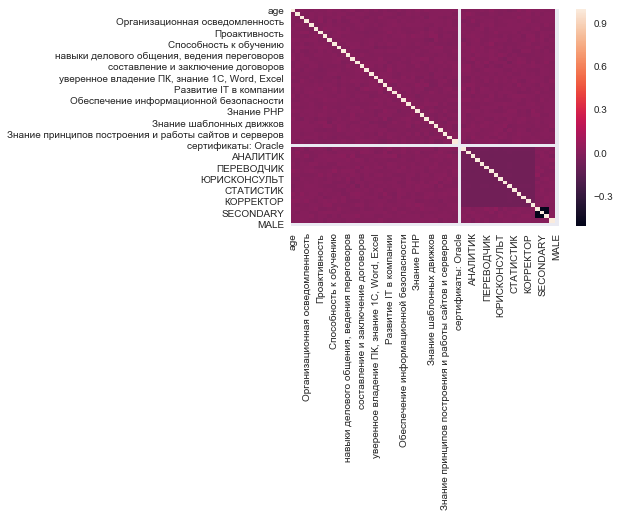

In [24]:
import seaborn as sns

sns.heatmap(df.corr())

In [25]:
y = dff['toProfession'].values

In [26]:
X = dff.drop('toProfession', axis=1).values

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.cross_validation import StratifiedKFold
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

/Users/nika/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/Users/nika/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/nika/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  

In [30]:
from sklearn import cross_validation
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm.libsvm import cross_validation
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing as pr

In [31]:
cv = StratifiedKFold(y, n_folds=3, shuffle=True, random_state=1)

In [32]:
# Encode for string labels
label_encoder = pr.LabelEncoder().fit(y)
y = label_encoder.transform(y)

In [33]:
label_encoder.classes_

array(['FRONTEND DEVELOPER', 'IT-ИНЖЕНЕР', 'JAVA DEVELOPER',
       'PYTHON РАЗРАБОТЧИК', 'QA-ИНЖЕНЕР', 'БИЗНЕС-АНАЛИТИК',
       'ИНЖЕНЕР-ТЕСТИРОВЩИК', 'НАГРУЗОЧНЫЙ ТЕСТИРОВЩИК',
       'СИСТЕМНЫЙ АНАЛИТИК'], dtype=object)

In [34]:
y

array([8, 5, 1, ..., 2, 4, 0])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
model = LinearRegression()

parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=None)
grid.fit(X_train, y_train)
print ("r2 / variance : ", grid.best_score_) 
print("Residual sum of squares: %.2f"
              % np.mean((grid.predict(X_test) - y_test) ** 2))

r2 / variance :  -0.01807559683981937
Residual sum of squares: 6.67


In [60]:
from sklearn import preprocessing
from sklearn import svm
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
clf = svm.SVR(C=1).fit(X_train_transformed, y_train)
X_test_transformed = scaler.transform(X_test)
clf.score(X_test_transformed, y_test)

-0.059132010155289016

In [62]:
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    LinearSVC(),
    RandomForestClassifier(n_estimators=100), 
    GradientBoostingClassifier(n_estimators=100)
]

for model in models:
    %time print(model, '\nAccuracy:', cross_val_score(model, X, y, cv=5).mean())
    print()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) 
Accuracy: 0.11119578654285671
CPU times: user 2.08 s, sys: 206 ms, total: 2.28 s
Wall time: 1.17 s

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform') 
Accuracy: 0.10730218600053527
CPU times: user 2.22 s, sys: 64.5 ms, total: 2.28 s
Wall time: 2.04 s

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 
Accuracy: 0.11379

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
param_grid ={
'C': 10**np.arange(-5,6, dtype=np.float_)
,'max_iter': np.arange(100,501,100)
,'penalty' :['l1','l2']
, 'random_state': [42]
, 'fit_intercept' :['True','False'],

} 

In [65]:
print(round(GridSearchCV(
   LogisticRegression(),  param_grid, cv=5, verbose=777).fit(X, y).best_score_, 4))

Fitting 5 folds for each of 220 candidates, totalling 1100 fits
[CV] C=1e-05, fit_intercept=True, max_iter=100, penalty=l1, random_state=42 
[CV]  C=1e-05, fit_intercept=True, max_iter=100, penalty=l1, random_state=42, score=0.11838161838161838, total=   0.1s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[CV] C=1e-05, fit_intercept=True, max_iter=100, penalty=l1, random_state=42 
[CV]  C=1e-05, fit_intercept=True, max_iter=100, penalty=l1, random_state=42, score=0.1184407796101949, total=   0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[CV] C=1e-05, fit_intercept=True, max_iter=100, penalty=l1, random_state=42 
[CV]  C=1e-05, fit_intercept=True, max_iter=100, penalty=l1, random_state=42, score=0.1184407796101949, total=   0.1s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[CV] C=1e-05, fit_intercept=True, max_iter=100, penalty=l1, random_state=42 
[CV]  C=1e-05, fit_intercept=True

[CV]  C=1e-05, fit_intercept=True, max_iter=400, penalty=l1, random_state=42, score=0.11855927963981991, total=   0.1s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    3.0s remaining:    0.0s
[CV] C=1e-05, fit_intercept=True, max_iter=400, penalty=l1, random_state=42 
[CV]  C=1e-05, fit_intercept=True, max_iter=400, penalty=l1, random_state=42, score=0.1186780170255383, total=   0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    3.1s remaining:    0.0s
[CV] C=1e-05, fit_intercept=True, max_iter=400, penalty=l2, random_state=42 
[CV]  C=1e-05, fit_intercept=True, max_iter=400, penalty=l2, random_state=42, score=0.11838161838161838, total=   0.1s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    3.2s remaining:    0.0s
[CV] C=1e-05, fit_intercept=True, max_iter=400, penalty=l2, random_state=42 
[CV]  C=1e-05, fit_intercept=True, max_iter=400, penalty=l2, random_state=42, score=0.1184407796101949, total=   0.1s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:   

[CV]  C=1e-05, fit_intercept=False, max_iter=200, penalty=l1, random_state=42, score=0.1186780170255383, total=   0.1s
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    5.8s remaining:    0.0s
[CV] C=1e-05, fit_intercept=False, max_iter=200, penalty=l2, random_state=42 
[CV]  C=1e-05, fit_intercept=False, max_iter=200, penalty=l2, random_state=42, score=0.11838161838161838, total=   0.1s
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    5.9s remaining:    0.0s
[CV] C=1e-05, fit_intercept=False, max_iter=200, penalty=l2, random_state=42 
[CV]  C=1e-05, fit_intercept=False, max_iter=200, penalty=l2, random_state=42, score=0.1184407796101949, total=   0.1s
[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    6.0s remaining:    0.0s
[CV] C=1e-05, fit_intercept=False, max_iter=200, penalty=l2, random_state=42 
[CV]  C=1e-05, fit_intercept=False, max_iter=200, penalty=l2, random_state=42, score=0.1184407796101949, total=   0.1s
[Parallel(n_jobs=1)]: Done  68 out of  68 | elaps

[CV]  C=1e-05, fit_intercept=False, max_iter=500, penalty=l1, random_state=42, score=0.1186780170255383, total=   0.1s
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    8.8s remaining:    0.0s
[CV] C=1e-05, fit_intercept=False, max_iter=500, penalty=l2, random_state=42 
[CV]  C=1e-05, fit_intercept=False, max_iter=500, penalty=l2, random_state=42, score=0.11838161838161838, total=   0.1s
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:    8.9s remaining:    0.0s
[CV] C=1e-05, fit_intercept=False, max_iter=500, penalty=l2, random_state=42 
[CV]  C=1e-05, fit_intercept=False, max_iter=500, penalty=l2, random_state=42, score=0.1184407796101949, total=   0.1s
[Parallel(n_jobs=1)]: Done  97 out of  97 | elapsed:    9.0s remaining:    0.0s
[CV] C=1e-05, fit_intercept=False, max_iter=500, penalty=l2, random_state=42 
[CV]  C=1e-05, fit_intercept=False, max_iter=500, penalty=l2, random_state=42, score=0.1184407796101949, total=   0.1s
[Parallel(n_jobs=1)]: Done  98 out of  98 | elaps

[CV]  C=0.0001, fit_intercept=True, max_iter=300, penalty=l2, random_state=42, score=0.11838161838161838, total=   0.1s
[Parallel(n_jobs=1)]: Done 126 out of 126 | elapsed:   12.1s remaining:    0.0s
[CV] C=0.0001, fit_intercept=True, max_iter=300, penalty=l2, random_state=42 
[CV]  C=0.0001, fit_intercept=True, max_iter=300, penalty=l2, random_state=42, score=0.1184407796101949, total=   0.1s
[Parallel(n_jobs=1)]: Done 127 out of 127 | elapsed:   12.3s remaining:    0.0s
[CV] C=0.0001, fit_intercept=True, max_iter=300, penalty=l2, random_state=42 
[CV]  C=0.0001, fit_intercept=True, max_iter=300, penalty=l2, random_state=42, score=0.1184407796101949, total=   0.1s
[Parallel(n_jobs=1)]: Done 128 out of 128 | elapsed:   12.4s remaining:    0.0s
[CV] C=0.0001, fit_intercept=True, max_iter=300, penalty=l2, random_state=42 
[CV]  C=0.0001, fit_intercept=True, max_iter=300, penalty=l2, random_state=42, score=0.11855927963981991, total=   0.1s
[Parallel(n_jobs=1)]: Done 129 out of 129 | elap

[CV]  C=0.0001, fit_intercept=False, max_iter=100, penalty=l2, random_state=42, score=0.11838161838161838, total=   0.1s
[Parallel(n_jobs=1)]: Done 156 out of 156 | elapsed:   15.4s remaining:    0.0s
[CV] C=0.0001, fit_intercept=False, max_iter=100, penalty=l2, random_state=42 
[CV]  C=0.0001, fit_intercept=False, max_iter=100, penalty=l2, random_state=42, score=0.1184407796101949, total=   0.1s
[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:   15.5s remaining:    0.0s
[CV] C=0.0001, fit_intercept=False, max_iter=100, penalty=l2, random_state=42 
[CV]  C=0.0001, fit_intercept=False, max_iter=100, penalty=l2, random_state=42, score=0.1184407796101949, total=   0.1s
[Parallel(n_jobs=1)]: Done 158 out of 158 | elapsed:   15.6s remaining:    0.0s
[CV] C=0.0001, fit_intercept=False, max_iter=100, penalty=l2, random_state=42 
[CV]  C=0.0001, fit_intercept=False, max_iter=100, penalty=l2, random_state=42, score=0.11855927963981991, total=   0.1s
[Parallel(n_jobs=1)]: Done 159 out of 159

[CV]  C=0.0001, fit_intercept=False, max_iter=400, penalty=l2, random_state=42, score=0.11838161838161838, total=   0.1s
[Parallel(n_jobs=1)]: Done 186 out of 186 | elapsed:   18.5s remaining:    0.0s
[CV] C=0.0001, fit_intercept=False, max_iter=400, penalty=l2, random_state=42 
[CV]  C=0.0001, fit_intercept=False, max_iter=400, penalty=l2, random_state=42, score=0.1184407796101949, total=   0.1s
[Parallel(n_jobs=1)]: Done 187 out of 187 | elapsed:   18.6s remaining:    0.0s
[CV] C=0.0001, fit_intercept=False, max_iter=400, penalty=l2, random_state=42 
[CV]  C=0.0001, fit_intercept=False, max_iter=400, penalty=l2, random_state=42, score=0.1184407796101949, total=   0.1s
[Parallel(n_jobs=1)]: Done 188 out of 188 | elapsed:   18.8s remaining:    0.0s
[CV] C=0.0001, fit_intercept=False, max_iter=400, penalty=l2, random_state=42 
[CV]  C=0.0001, fit_intercept=False, max_iter=400, penalty=l2, random_state=42, score=0.11855927963981991, total=   0.1s
[Parallel(n_jobs=1)]: Done 189 out of 189

[CV]  C=0.001, fit_intercept=True, max_iter=200, penalty=l2, random_state=42, score=0.12437562437562437, total=   0.1s
[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:   21.8s remaining:    0.0s
[CV] C=0.001, fit_intercept=True, max_iter=200, penalty=l2, random_state=42 
[CV]  C=0.001, fit_intercept=True, max_iter=200, penalty=l2, random_state=42, score=0.11694152923538231, total=   0.1s
[Parallel(n_jobs=1)]: Done 217 out of 217 | elapsed:   21.9s remaining:    0.0s
[CV] C=0.001, fit_intercept=True, max_iter=200, penalty=l2, random_state=42 
[CV]  C=0.001, fit_intercept=True, max_iter=200, penalty=l2, random_state=42, score=0.12643678160919541, total=   0.1s
[Parallel(n_jobs=1)]: Done 218 out of 218 | elapsed:   22.1s remaining:    0.0s
[CV] C=0.001, fit_intercept=True, max_iter=200, penalty=l2, random_state=42 
[CV]  C=0.001, fit_intercept=True, max_iter=200, penalty=l2, random_state=42, score=0.12406203101550775, total=   0.1s
[Parallel(n_jobs=1)]: Done 219 out of 219 | elapsed: 

[CV]  C=0.001, fit_intercept=True, max_iter=500, penalty=l2, random_state=42, score=0.12437562437562437, total=   0.1s
[Parallel(n_jobs=1)]: Done 246 out of 246 | elapsed:   25.4s remaining:    0.0s
[CV] C=0.001, fit_intercept=True, max_iter=500, penalty=l2, random_state=42 
[CV]  C=0.001, fit_intercept=True, max_iter=500, penalty=l2, random_state=42, score=0.11694152923538231, total=   0.2s
[Parallel(n_jobs=1)]: Done 247 out of 247 | elapsed:   25.5s remaining:    0.0s
[CV] C=0.001, fit_intercept=True, max_iter=500, penalty=l2, random_state=42 
[CV]  C=0.001, fit_intercept=True, max_iter=500, penalty=l2, random_state=42, score=0.12643678160919541, total=   0.2s
[Parallel(n_jobs=1)]: Done 248 out of 248 | elapsed:   25.7s remaining:    0.0s
[CV] C=0.001, fit_intercept=True, max_iter=500, penalty=l2, random_state=42 
[CV]  C=0.001, fit_intercept=True, max_iter=500, penalty=l2, random_state=42, score=0.12406203101550775, total=   0.1s
[Parallel(n_jobs=1)]: Done 249 out of 249 | elapsed: 

[CV]  C=0.001, fit_intercept=False, max_iter=300, penalty=l2, random_state=42, score=0.12437562437562437, total=   0.1s
[Parallel(n_jobs=1)]: Done 276 out of 276 | elapsed:   29.3s remaining:    0.0s
[CV] C=0.001, fit_intercept=False, max_iter=300, penalty=l2, random_state=42 
[CV]  C=0.001, fit_intercept=False, max_iter=300, penalty=l2, random_state=42, score=0.11694152923538231, total=   0.1s
[Parallel(n_jobs=1)]: Done 277 out of 277 | elapsed:   29.5s remaining:    0.0s
[CV] C=0.001, fit_intercept=False, max_iter=300, penalty=l2, random_state=42 
[CV]  C=0.001, fit_intercept=False, max_iter=300, penalty=l2, random_state=42, score=0.12643678160919541, total=   0.2s
[Parallel(n_jobs=1)]: Done 278 out of 278 | elapsed:   29.7s remaining:    0.0s
[CV] C=0.001, fit_intercept=False, max_iter=300, penalty=l2, random_state=42 
[CV]  C=0.001, fit_intercept=False, max_iter=300, penalty=l2, random_state=42, score=0.12406203101550775, total=   0.1s
[Parallel(n_jobs=1)]: Done 279 out of 279 | el

[CV]  C=0.01, fit_intercept=True, max_iter=100, penalty=l2, random_state=42, score=0.12437562437562437, total=   0.2s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:   33.4s remaining:    0.0s
[CV] C=0.01, fit_intercept=True, max_iter=100, penalty=l2, random_state=42 
[CV]  C=0.01, fit_intercept=True, max_iter=100, penalty=l2, random_state=42, score=0.1184407796101949, total=   0.2s
[Parallel(n_jobs=1)]: Done 307 out of 307 | elapsed:   33.6s remaining:    0.0s
[CV] C=0.01, fit_intercept=True, max_iter=100, penalty=l2, random_state=42 
[CV]  C=0.01, fit_intercept=True, max_iter=100, penalty=l2, random_state=42, score=0.12293853073463268, total=   0.2s
[Parallel(n_jobs=1)]: Done 308 out of 308 | elapsed:   33.8s remaining:    0.0s
[CV] C=0.01, fit_intercept=True, max_iter=100, penalty=l2, random_state=42 
[CV]  C=0.01, fit_intercept=True, max_iter=100, penalty=l2, random_state=42, score=0.11255627813906953, total=   0.2s
[Parallel(n_jobs=1)]: Done 309 out of 309 | elapsed:   33.9s 

[CV]  C=0.01, fit_intercept=True, max_iter=400, penalty=l2, random_state=42, score=0.12437562437562437, total=   0.2s
[Parallel(n_jobs=1)]: Done 336 out of 336 | elapsed:   38.6s remaining:    0.0s
[CV] C=0.01, fit_intercept=True, max_iter=400, penalty=l2, random_state=42 
[CV]  C=0.01, fit_intercept=True, max_iter=400, penalty=l2, random_state=42, score=0.1184407796101949, total=   0.2s
[Parallel(n_jobs=1)]: Done 337 out of 337 | elapsed:   38.7s remaining:    0.0s
[CV] C=0.01, fit_intercept=True, max_iter=400, penalty=l2, random_state=42 
[CV]  C=0.01, fit_intercept=True, max_iter=400, penalty=l2, random_state=42, score=0.12293853073463268, total=   0.2s
[Parallel(n_jobs=1)]: Done 338 out of 338 | elapsed:   38.9s remaining:    0.0s
[CV] C=0.01, fit_intercept=True, max_iter=400, penalty=l2, random_state=42 
[CV]  C=0.01, fit_intercept=True, max_iter=400, penalty=l2, random_state=42, score=0.11255627813906953, total=   0.3s
[Parallel(n_jobs=1)]: Done 339 out of 339 | elapsed:   39.2s 

[CV]  C=0.01, fit_intercept=False, max_iter=200, penalty=l2, random_state=42, score=0.1184407796101949, total=   0.2s
[Parallel(n_jobs=1)]: Done 367 out of 367 | elapsed:   43.9s remaining:    0.0s
[CV] C=0.01, fit_intercept=False, max_iter=200, penalty=l2, random_state=42 
[CV]  C=0.01, fit_intercept=False, max_iter=200, penalty=l2, random_state=42, score=0.12293853073463268, total=   0.2s
[Parallel(n_jobs=1)]: Done 368 out of 368 | elapsed:   44.1s remaining:    0.0s
[CV] C=0.01, fit_intercept=False, max_iter=200, penalty=l2, random_state=42 
[CV]  C=0.01, fit_intercept=False, max_iter=200, penalty=l2, random_state=42, score=0.11255627813906953, total=   0.2s
[Parallel(n_jobs=1)]: Done 369 out of 369 | elapsed:   44.3s remaining:    0.0s
[CV] C=0.01, fit_intercept=False, max_iter=200, penalty=l2, random_state=42 
[CV]  C=0.01, fit_intercept=False, max_iter=200, penalty=l2, random_state=42, score=0.11166750125187781, total=   0.2s
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:  

[CV]  C=0.01, fit_intercept=False, max_iter=500, penalty=l2, random_state=42, score=0.1184407796101949, total=   0.2s
[Parallel(n_jobs=1)]: Done 397 out of 397 | elapsed:   49.2s remaining:    0.0s
[CV] C=0.01, fit_intercept=False, max_iter=500, penalty=l2, random_state=42 
[CV]  C=0.01, fit_intercept=False, max_iter=500, penalty=l2, random_state=42, score=0.12293853073463268, total=   0.2s
[Parallel(n_jobs=1)]: Done 398 out of 398 | elapsed:   49.4s remaining:    0.0s
[CV] C=0.01, fit_intercept=False, max_iter=500, penalty=l2, random_state=42 
[CV]  C=0.01, fit_intercept=False, max_iter=500, penalty=l2, random_state=42, score=0.11255627813906953, total=   0.2s
[Parallel(n_jobs=1)]: Done 399 out of 399 | elapsed:   49.6s remaining:    0.0s
[CV] C=0.01, fit_intercept=False, max_iter=500, penalty=l2, random_state=42 
[CV]  C=0.01, fit_intercept=False, max_iter=500, penalty=l2, random_state=42, score=0.11166750125187781, total=   0.2s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  

[CV]  C=0.1, fit_intercept=True, max_iter=300, penalty=l2, random_state=42, score=0.11594202898550725, total=   0.2s
[Parallel(n_jobs=1)]: Done 428 out of 428 | elapsed:   56.6s remaining:    0.0s
[CV] C=0.1, fit_intercept=True, max_iter=300, penalty=l2, random_state=42 
[CV]  C=0.1, fit_intercept=True, max_iter=300, penalty=l2, random_state=42, score=0.11105552776388194, total=   0.3s
[Parallel(n_jobs=1)]: Done 429 out of 429 | elapsed:   56.9s remaining:    0.0s
[CV] C=0.1, fit_intercept=True, max_iter=300, penalty=l2, random_state=42 
[CV]  C=0.1, fit_intercept=True, max_iter=300, penalty=l2, random_state=42, score=0.10165247871807712, total=   0.2s
[Parallel(n_jobs=1)]: Done 430 out of 430 | elapsed:   57.1s remaining:    0.0s
[CV] C=0.1, fit_intercept=True, max_iter=400, penalty=l1, random_state=42 
[CV]  C=0.1, fit_intercept=True, max_iter=400, penalty=l1, random_state=42, score=0.12637362637362637, total=   0.2s
[Parallel(n_jobs=1)]: Done 431 out of 431 | elapsed:   57.4s remain

[CV]  C=0.1, fit_intercept=False, max_iter=100, penalty=l2, random_state=42, score=0.11105552776388194, total=   0.2s
[Parallel(n_jobs=1)]: Done 459 out of 459 | elapsed:  1.1min remaining:    0.0s
[CV] C=0.1, fit_intercept=False, max_iter=100, penalty=l2, random_state=42 
[CV]  C=0.1, fit_intercept=False, max_iter=100, penalty=l2, random_state=42, score=0.10165247871807712, total=   0.2s
[Parallel(n_jobs=1)]: Done 460 out of 460 | elapsed:  1.1min remaining:    0.0s
[CV] C=0.1, fit_intercept=False, max_iter=200, penalty=l1, random_state=42 
[CV]  C=0.1, fit_intercept=False, max_iter=200, penalty=l1, random_state=42, score=0.12637362637362637, total=   0.2s
[Parallel(n_jobs=1)]: Done 461 out of 461 | elapsed:  1.1min remaining:    0.0s
[CV] C=0.1, fit_intercept=False, max_iter=200, penalty=l1, random_state=42 
[CV]  C=0.1, fit_intercept=False, max_iter=200, penalty=l1, random_state=42, score=0.12643678160919541, total=   0.2s
[Parallel(n_jobs=1)]: Done 462 out of 462 | elapsed:  1.1min

[CV]  C=0.1, fit_intercept=False, max_iter=400, penalty=l2, random_state=42, score=0.11105552776388194, total=   0.2s
[Parallel(n_jobs=1)]: Done 489 out of 489 | elapsed:  1.2min remaining:    0.0s
[CV] C=0.1, fit_intercept=False, max_iter=400, penalty=l2, random_state=42 
[CV]  C=0.1, fit_intercept=False, max_iter=400, penalty=l2, random_state=42, score=0.10165247871807712, total=   0.2s
[Parallel(n_jobs=1)]: Done 490 out of 490 | elapsed:  1.2min remaining:    0.0s
[CV] C=0.1, fit_intercept=False, max_iter=500, penalty=l1, random_state=42 
[CV]  C=0.1, fit_intercept=False, max_iter=500, penalty=l1, random_state=42, score=0.12637362637362637, total=   0.2s
[Parallel(n_jobs=1)]: Done 491 out of 491 | elapsed:  1.2min remaining:    0.0s
[CV] C=0.1, fit_intercept=False, max_iter=500, penalty=l1, random_state=42 
[CV]  C=0.1, fit_intercept=False, max_iter=500, penalty=l1, random_state=42, score=0.12643678160919541, total=   0.2s
[Parallel(n_jobs=1)]: Done 492 out of 492 | elapsed:  1.2min

[CV]  C=1.0, fit_intercept=True, max_iter=200, penalty=l2, random_state=42, score=0.10265398097145718, total=   0.2s
[Parallel(n_jobs=1)]: Done 520 out of 520 | elapsed:  1.4min remaining:    0.0s
[CV] C=1.0, fit_intercept=True, max_iter=300, penalty=l1, random_state=42 
[CV]  C=1.0, fit_intercept=True, max_iter=300, penalty=l1, random_state=42, score=0.11788211788211789, total=   0.9s
[Parallel(n_jobs=1)]: Done 521 out of 521 | elapsed:  1.4min remaining:    0.0s
[CV] C=1.0, fit_intercept=True, max_iter=300, penalty=l1, random_state=42 
[CV]  C=1.0, fit_intercept=True, max_iter=300, penalty=l1, random_state=42, score=0.11394302848575712, total=   0.9s
[Parallel(n_jobs=1)]: Done 522 out of 522 | elapsed:  1.5min remaining:    0.0s
[CV] C=1.0, fit_intercept=True, max_iter=300, penalty=l1, random_state=42 
[CV]  C=1.0, fit_intercept=True, max_iter=300, penalty=l1, random_state=42, score=0.11444277861069466, total=   0.9s
[Parallel(n_jobs=1)]: Done 523 out of 523 | elapsed:  1.5min remain

[CV]  C=1.0, fit_intercept=False, max_iter=100, penalty=l1, random_state=42, score=0.11788211788211789, total=   1.2s
[Parallel(n_jobs=1)]: Done 551 out of 551 | elapsed:  1.7min remaining:    0.0s
[CV] C=1.0, fit_intercept=False, max_iter=100, penalty=l1, random_state=42 
[CV]  C=1.0, fit_intercept=False, max_iter=100, penalty=l1, random_state=42, score=0.11394302848575712, total=   1.0s
[Parallel(n_jobs=1)]: Done 552 out of 552 | elapsed:  1.8min remaining:    0.0s
[CV] C=1.0, fit_intercept=False, max_iter=100, penalty=l1, random_state=42 
[CV]  C=1.0, fit_intercept=False, max_iter=100, penalty=l1, random_state=42, score=0.11444277861069466, total=   0.9s
[Parallel(n_jobs=1)]: Done 553 out of 553 | elapsed:  1.8min remaining:    0.0s
[CV] C=1.0, fit_intercept=False, max_iter=100, penalty=l1, random_state=42 
[CV]  C=1.0, fit_intercept=False, max_iter=100, penalty=l1, random_state=42, score=0.11155577788894447, total=   1.0s
[Parallel(n_jobs=1)]: Done 554 out of 554 | elapsed:  1.8min

[CV]  C=1.0, fit_intercept=False, max_iter=400, penalty=l1, random_state=42, score=0.11788211788211789, total=   0.9s
[Parallel(n_jobs=1)]: Done 581 out of 581 | elapsed:  2.0min remaining:    0.0s
[CV] C=1.0, fit_intercept=False, max_iter=400, penalty=l1, random_state=42 
[CV]  C=1.0, fit_intercept=False, max_iter=400, penalty=l1, random_state=42, score=0.11394302848575712, total=   0.9s
[Parallel(n_jobs=1)]: Done 582 out of 582 | elapsed:  2.0min remaining:    0.0s
[CV] C=1.0, fit_intercept=False, max_iter=400, penalty=l1, random_state=42 
[CV]  C=1.0, fit_intercept=False, max_iter=400, penalty=l1, random_state=42, score=0.11444277861069466, total=   0.8s
[Parallel(n_jobs=1)]: Done 583 out of 583 | elapsed:  2.0min remaining:    0.0s
[CV] C=1.0, fit_intercept=False, max_iter=400, penalty=l1, random_state=42 
[CV]  C=1.0, fit_intercept=False, max_iter=400, penalty=l1, random_state=42, score=0.11155577788894447, total=   0.9s
[Parallel(n_jobs=1)]: Done 584 out of 584 | elapsed:  2.1min

[CV]  C=10.0, fit_intercept=True, max_iter=200, penalty=l1, random_state=42, score=0.11638361638361638, total=   1.9s
[Parallel(n_jobs=1)]: Done 611 out of 611 | elapsed:  2.4min remaining:    0.0s
[CV] C=10.0, fit_intercept=True, max_iter=200, penalty=l1, random_state=42 
[CV]  C=10.0, fit_intercept=True, max_iter=200, penalty=l1, random_state=42, score=0.11294352823588207, total=   2.8s
[Parallel(n_jobs=1)]: Done 612 out of 612 | elapsed:  2.4min remaining:    0.0s
[CV] C=10.0, fit_intercept=True, max_iter=200, penalty=l1, random_state=42 
[CV]  C=10.0, fit_intercept=True, max_iter=200, penalty=l1, random_state=42, score=0.11494252873563218, total=   2.0s
[Parallel(n_jobs=1)]: Done 613 out of 613 | elapsed:  2.5min remaining:    0.0s
[CV] C=10.0, fit_intercept=True, max_iter=200, penalty=l1, random_state=42 
[CV]  C=10.0, fit_intercept=True, max_iter=200, penalty=l1, random_state=42, score=0.11105552776388194, total=   1.9s
[Parallel(n_jobs=1)]: Done 614 out of 614 | elapsed:  2.5min

[CV]  C=10.0, fit_intercept=True, max_iter=500, penalty=l1, random_state=42, score=0.11638361638361638, total=   1.9s
[Parallel(n_jobs=1)]: Done 641 out of 641 | elapsed:  2.9min remaining:    0.0s
[CV] C=10.0, fit_intercept=True, max_iter=500, penalty=l1, random_state=42 
[CV]  C=10.0, fit_intercept=True, max_iter=500, penalty=l1, random_state=42, score=0.11294352823588207, total=   2.7s
[Parallel(n_jobs=1)]: Done 642 out of 642 | elapsed:  3.0min remaining:    0.0s
[CV] C=10.0, fit_intercept=True, max_iter=500, penalty=l1, random_state=42 
[CV]  C=10.0, fit_intercept=True, max_iter=500, penalty=l1, random_state=42, score=0.11494252873563218, total=   2.0s
[Parallel(n_jobs=1)]: Done 643 out of 643 | elapsed:  3.0min remaining:    0.0s
[CV] C=10.0, fit_intercept=True, max_iter=500, penalty=l1, random_state=42 
[CV]  C=10.0, fit_intercept=True, max_iter=500, penalty=l1, random_state=42, score=0.11105552776388194, total=   1.9s
[Parallel(n_jobs=1)]: Done 644 out of 644 | elapsed:  3.0min

[CV]  C=10.0, fit_intercept=False, max_iter=300, penalty=l1, random_state=42, score=0.11638361638361638, total=   1.8s
[Parallel(n_jobs=1)]: Done 671 out of 671 | elapsed:  3.5min remaining:    0.0s
[CV] C=10.0, fit_intercept=False, max_iter=300, penalty=l1, random_state=42 
[CV]  C=10.0, fit_intercept=False, max_iter=300, penalty=l1, random_state=42, score=0.11294352823588207, total=   2.7s
[Parallel(n_jobs=1)]: Done 672 out of 672 | elapsed:  3.5min remaining:    0.0s
[CV] C=10.0, fit_intercept=False, max_iter=300, penalty=l1, random_state=42 
[CV]  C=10.0, fit_intercept=False, max_iter=300, penalty=l1, random_state=42, score=0.11494252873563218, total=   2.0s
[Parallel(n_jobs=1)]: Done 673 out of 673 | elapsed:  3.5min remaining:    0.0s
[CV] C=10.0, fit_intercept=False, max_iter=300, penalty=l1, random_state=42 
[CV]  C=10.0, fit_intercept=False, max_iter=300, penalty=l1, random_state=42, score=0.11105552776388194, total=   1.9s
[Parallel(n_jobs=1)]: Done 674 out of 674 | elapsed: 

[CV]  C=100.0, fit_intercept=True, max_iter=100, penalty=l1, random_state=42, score=0.11688311688311688, total=   0.3s
[Parallel(n_jobs=1)]: Done 701 out of 701 | elapsed:  4.0min remaining:    0.0s
[CV] C=100.0, fit_intercept=True, max_iter=100, penalty=l1, random_state=42 
[CV]  C=100.0, fit_intercept=True, max_iter=100, penalty=l1, random_state=42, score=0.11144427786106946, total=   0.3s
[Parallel(n_jobs=1)]: Done 702 out of 702 | elapsed:  4.0min remaining:    0.0s
[CV] C=100.0, fit_intercept=True, max_iter=100, penalty=l1, random_state=42 
[CV]  C=100.0, fit_intercept=True, max_iter=100, penalty=l1, random_state=42, score=0.11594202898550725, total=   0.3s
[Parallel(n_jobs=1)]: Done 703 out of 703 | elapsed:  4.0min remaining:    0.0s
[CV] C=100.0, fit_intercept=True, max_iter=100, penalty=l1, random_state=42 
[CV]  C=100.0, fit_intercept=True, max_iter=100, penalty=l1, random_state=42, score=0.11005502751375688, total=   0.3s
[Parallel(n_jobs=1)]: Done 704 out of 704 | elapsed: 

[CV]  C=100.0, fit_intercept=True, max_iter=400, penalty=l1, random_state=42, score=0.11688311688311688, total=   0.3s
[Parallel(n_jobs=1)]: Done 731 out of 731 | elapsed:  4.1min remaining:    0.0s
[CV] C=100.0, fit_intercept=True, max_iter=400, penalty=l1, random_state=42 
[CV]  C=100.0, fit_intercept=True, max_iter=400, penalty=l1, random_state=42, score=0.11144427786106946, total=   0.3s
[Parallel(n_jobs=1)]: Done 732 out of 732 | elapsed:  4.1min remaining:    0.0s
[CV] C=100.0, fit_intercept=True, max_iter=400, penalty=l1, random_state=42 
[CV]  C=100.0, fit_intercept=True, max_iter=400, penalty=l1, random_state=42, score=0.11594202898550725, total=   0.3s
[Parallel(n_jobs=1)]: Done 733 out of 733 | elapsed:  4.1min remaining:    0.0s
[CV] C=100.0, fit_intercept=True, max_iter=400, penalty=l1, random_state=42 
[CV]  C=100.0, fit_intercept=True, max_iter=400, penalty=l1, random_state=42, score=0.11005502751375688, total=   0.3s
[Parallel(n_jobs=1)]: Done 734 out of 734 | elapsed: 

[CV]  C=100.0, fit_intercept=False, max_iter=200, penalty=l1, random_state=42, score=0.11688311688311688, total=   0.3s
[Parallel(n_jobs=1)]: Done 761 out of 761 | elapsed:  4.3min remaining:    0.0s
[CV] C=100.0, fit_intercept=False, max_iter=200, penalty=l1, random_state=42 
[CV]  C=100.0, fit_intercept=False, max_iter=200, penalty=l1, random_state=42, score=0.11144427786106946, total=   0.3s
[Parallel(n_jobs=1)]: Done 762 out of 762 | elapsed:  4.3min remaining:    0.0s
[CV] C=100.0, fit_intercept=False, max_iter=200, penalty=l1, random_state=42 
[CV]  C=100.0, fit_intercept=False, max_iter=200, penalty=l1, random_state=42, score=0.11594202898550725, total=   0.3s
[Parallel(n_jobs=1)]: Done 763 out of 763 | elapsed:  4.3min remaining:    0.0s
[CV] C=100.0, fit_intercept=False, max_iter=200, penalty=l1, random_state=42 
[CV]  C=100.0, fit_intercept=False, max_iter=200, penalty=l1, random_state=42, score=0.11005502751375688, total=   0.3s
[Parallel(n_jobs=1)]: Done 764 out of 764 | el

[CV]  C=100.0, fit_intercept=False, max_iter=500, penalty=l2, random_state=42, score=0.11688311688311688, total=   0.2s
[CV] C=100.0, fit_intercept=False, max_iter=500, penalty=l2, random_state=42 
[CV]  C=100.0, fit_intercept=False, max_iter=500, penalty=l2, random_state=42, score=0.111944027986007, total=   0.2s
[CV] C=100.0, fit_intercept=False, max_iter=500, penalty=l2, random_state=42 
[CV]  C=100.0, fit_intercept=False, max_iter=500, penalty=l2, random_state=42, score=0.11494252873563218, total=   0.2s
[CV] C=100.0, fit_intercept=False, max_iter=500, penalty=l2, random_state=42 
[CV]  C=100.0, fit_intercept=False, max_iter=500, penalty=l2, random_state=42, score=0.11055527763881941, total=   0.2s
[CV] C=100.0, fit_intercept=False, max_iter=500, penalty=l2, random_state=42 
[CV]  C=100.0, fit_intercept=False, max_iter=500, penalty=l2, random_state=42, score=0.10315473209814723, total=   0.2s
[CV] C=1000.0, fit_intercept=True, max_iter=100, penalty=l1, random_state=42 
[CV]  C=1000

[CV]  C=1000.0, fit_intercept=True, max_iter=400, penalty=l2, random_state=42, score=0.11494252873563218, total=   0.2s
[CV] C=1000.0, fit_intercept=True, max_iter=400, penalty=l2, random_state=42 
[CV]  C=1000.0, fit_intercept=True, max_iter=400, penalty=l2, random_state=42, score=0.11055527763881941, total=   0.2s
[CV] C=1000.0, fit_intercept=True, max_iter=400, penalty=l2, random_state=42 
[CV]  C=1000.0, fit_intercept=True, max_iter=400, penalty=l2, random_state=42, score=0.10315473209814723, total=   0.2s
[CV] C=1000.0, fit_intercept=True, max_iter=500, penalty=l1, random_state=42 
[CV]  C=1000.0, fit_intercept=True, max_iter=500, penalty=l1, random_state=42, score=0.11738261738261738, total=   0.3s
[CV] C=1000.0, fit_intercept=True, max_iter=500, penalty=l1, random_state=42 
[CV]  C=1000.0, fit_intercept=True, max_iter=500, penalty=l1, random_state=42, score=0.11144427786106946, total=   0.3s
[CV] C=1000.0, fit_intercept=True, max_iter=500, penalty=l1, random_state=42 
[CV]  C=10

[CV]  C=1000.0, fit_intercept=False, max_iter=300, penalty=l2, random_state=42, score=0.10315473209814723, total=   0.2s
[CV] C=1000.0, fit_intercept=False, max_iter=400, penalty=l1, random_state=42 
[CV]  C=1000.0, fit_intercept=False, max_iter=400, penalty=l1, random_state=42, score=0.11738261738261738, total=   0.3s
[CV] C=1000.0, fit_intercept=False, max_iter=400, penalty=l1, random_state=42 
[CV]  C=1000.0, fit_intercept=False, max_iter=400, penalty=l1, random_state=42, score=0.11144427786106946, total=   0.3s
[CV] C=1000.0, fit_intercept=False, max_iter=400, penalty=l1, random_state=42 
[CV]  C=1000.0, fit_intercept=False, max_iter=400, penalty=l1, random_state=42, score=0.11594202898550725, total=   0.3s
[CV] C=1000.0, fit_intercept=False, max_iter=400, penalty=l1, random_state=42 
[CV]  C=1000.0, fit_intercept=False, max_iter=400, penalty=l1, random_state=42, score=0.11005502751375688, total=   0.3s
[CV] C=1000.0, fit_intercept=False, max_iter=400, penalty=l1, random_state=42 


[CV]  C=10000.0, fit_intercept=True, max_iter=300, penalty=l1, random_state=42, score=0.11144427786106946, total=   0.3s
[CV] C=10000.0, fit_intercept=True, max_iter=300, penalty=l1, random_state=42 
[CV]  C=10000.0, fit_intercept=True, max_iter=300, penalty=l1, random_state=42, score=0.11594202898550725, total=   0.4s
[CV] C=10000.0, fit_intercept=True, max_iter=300, penalty=l1, random_state=42 
[CV]  C=10000.0, fit_intercept=True, max_iter=300, penalty=l1, random_state=42, score=0.11005502751375688, total=   0.3s
[CV] C=10000.0, fit_intercept=True, max_iter=300, penalty=l1, random_state=42 
[CV]  C=10000.0, fit_intercept=True, max_iter=300, penalty=l1, random_state=42, score=0.10265398097145718, total=   0.4s
[CV] C=10000.0, fit_intercept=True, max_iter=300, penalty=l2, random_state=42 
[CV]  C=10000.0, fit_intercept=True, max_iter=300, penalty=l2, random_state=42, score=0.11688311688311688, total=   0.2s
[CV] C=10000.0, fit_intercept=True, max_iter=300, penalty=l2, random_state=42 


[CV]  C=10000.0, fit_intercept=False, max_iter=200, penalty=l1, random_state=42, score=0.11594202898550725, total=   0.3s
[CV] C=10000.0, fit_intercept=False, max_iter=200, penalty=l1, random_state=42 
[CV]  C=10000.0, fit_intercept=False, max_iter=200, penalty=l1, random_state=42, score=0.11005502751375688, total=   0.3s
[CV] C=10000.0, fit_intercept=False, max_iter=200, penalty=l1, random_state=42 
[CV]  C=10000.0, fit_intercept=False, max_iter=200, penalty=l1, random_state=42, score=0.10265398097145718, total=   0.3s
[CV] C=10000.0, fit_intercept=False, max_iter=200, penalty=l2, random_state=42 
[CV]  C=10000.0, fit_intercept=False, max_iter=200, penalty=l2, random_state=42, score=0.11688311688311688, total=   0.2s
[CV] C=10000.0, fit_intercept=False, max_iter=200, penalty=l2, random_state=42 
[CV]  C=10000.0, fit_intercept=False, max_iter=200, penalty=l2, random_state=42, score=0.111944027986007, total=   0.2s
[CV] C=10000.0, fit_intercept=False, max_iter=200, penalty=l2, random_st

[CV]  C=100000.0, fit_intercept=True, max_iter=100, penalty=l1, random_state=42, score=0.11005502751375688, total=   0.3s
[CV] C=100000.0, fit_intercept=True, max_iter=100, penalty=l1, random_state=42 
[CV]  C=100000.0, fit_intercept=True, max_iter=100, penalty=l1, random_state=42, score=0.10265398097145718, total=   0.3s
[CV] C=100000.0, fit_intercept=True, max_iter=100, penalty=l2, random_state=42 
[CV]  C=100000.0, fit_intercept=True, max_iter=100, penalty=l2, random_state=42, score=0.11688311688311688, total=   0.2s
[CV] C=100000.0, fit_intercept=True, max_iter=100, penalty=l2, random_state=42 
[CV]  C=100000.0, fit_intercept=True, max_iter=100, penalty=l2, random_state=42, score=0.111944027986007, total=   0.2s
[CV] C=100000.0, fit_intercept=True, max_iter=100, penalty=l2, random_state=42 
[CV]  C=100000.0, fit_intercept=True, max_iter=100, penalty=l2, random_state=42, score=0.11494252873563218, total=   0.2s
[CV] C=100000.0, fit_intercept=True, max_iter=100, penalty=l2, random_st

[CV]  C=100000.0, fit_intercept=True, max_iter=500, penalty=l1, random_state=42, score=0.10265398097145718, total=   0.3s
[CV] C=100000.0, fit_intercept=True, max_iter=500, penalty=l2, random_state=42 
[CV]  C=100000.0, fit_intercept=True, max_iter=500, penalty=l2, random_state=42, score=0.11688311688311688, total=   0.2s
[CV] C=100000.0, fit_intercept=True, max_iter=500, penalty=l2, random_state=42 
[CV]  C=100000.0, fit_intercept=True, max_iter=500, penalty=l2, random_state=42, score=0.111944027986007, total=   0.2s
[CV] C=100000.0, fit_intercept=True, max_iter=500, penalty=l2, random_state=42 
[CV]  C=100000.0, fit_intercept=True, max_iter=500, penalty=l2, random_state=42, score=0.11494252873563218, total=   0.2s
[CV] C=100000.0, fit_intercept=True, max_iter=500, penalty=l2, random_state=42 
[CV]  C=100000.0, fit_intercept=True, max_iter=500, penalty=l2, random_state=42, score=0.11055527763881941, total=   0.2s
[CV] C=100000.0, fit_intercept=True, max_iter=500, penalty=l2, random_st

[CV]  C=100000.0, fit_intercept=False, max_iter=400, penalty=l2, random_state=42, score=0.11688311688311688, total=   0.2s
[CV] C=100000.0, fit_intercept=False, max_iter=400, penalty=l2, random_state=42 
[CV]  C=100000.0, fit_intercept=False, max_iter=400, penalty=l2, random_state=42, score=0.111944027986007, total=   0.2s
[CV] C=100000.0, fit_intercept=False, max_iter=400, penalty=l2, random_state=42 
[CV]  C=100000.0, fit_intercept=False, max_iter=400, penalty=l2, random_state=42, score=0.11494252873563218, total=   0.2s
[CV] C=100000.0, fit_intercept=False, max_iter=400, penalty=l2, random_state=42 
[CV]  C=100000.0, fit_intercept=False, max_iter=400, penalty=l2, random_state=42, score=0.11055527763881941, total=   0.2s
[CV] C=100000.0, fit_intercept=False, max_iter=400, penalty=l2, random_state=42 
[CV]  C=100000.0, fit_intercept=False, max_iter=400, penalty=l2, random_state=42, score=0.10315473209814723, total=   0.2s
[CV] C=100000.0, fit_intercept=False, max_iter=500, penalty=l1,

In [36]:
from sklearn.svm import SVC

In [37]:
param_grid1 ={
'C': 10**np.arange(-3,2, dtype=np.float_)
,'gamma': 10**np.arange(-3,1, dtype=np.float_)
,'kernel': ['rbf']}
param_grid2 ={
'C': 10**np.arange(-3,2, dtype=np.float_)
,'gamma': 10**np.arange(-3,1, dtype=np.float_)

,'kernel': ['poly']}
param_grid ={
'C': 10**np.arange(-3,2, dtype=np.float_)
,'gamma': 10**np.arange(-3,1, dtype=np.float_)
,'kernel': ['linear']}

In [38]:
svc = SVC(kernel='linear', probability=True)

In [ ]:
grid_search = GridSearchCV(SVC(), param_grid, cv=27,  scoring='f1_micro', iid='warn')
grid_search.fit(X_train, y_train)

grid_search.best_params_
print( grid_search.best_params_)
print ('Best score: %0.3f' % grid_search.best_score_)
print ('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))

In [ ]:
grid_search = GridSearchCV(SVC(), param_grid1, cv=27,  scoring='f1_micro')
grid_search.fit(X_train, y_train)

grid_search.best_params_
print( grid_search.best_params_)
print ('Best score: %0.3f' % grid_search.best_score_)
print ('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(param_grid1.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.model_selection import cross_val_score

In [223]:
naive_b = GaussianNB()

In [226]:
naive_b.classes_

array(['FRONTEND DEVELOPER', 'IT-ИНЖЕНЕР', 'JAVA DEVELOPER',
       'PYTHON РАЗРАБОТЧИК', 'QA-ИНЖЕНЕР', 'БИЗНЕС-АНАЛИТИК',
       'ИНЖЕНЕР-ТЕСТИРОВЩИК', 'НАГРУЗОЧНЫЙ ТЕСТИРОВЩИК',
       'СИСТЕМНЫЙ АНАЛИТИК'], dtype='<U23')

In [225]:
naive_b.fit(X_train, y_train)

GaussianNB(priors=None)

In [227]:
import pickle

In [228]:
# save
with open('model.pkl','wb') as f:
    pickle.dump(naive_b,f)

# load
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)

clf2.predict(X_test)

array(['ИНЖЕНЕР-ТЕСТИРОВЩИК', 'СИСТЕМНЫЙ АНАЛИТИК', 'QA-ИНЖЕНЕР', ...,
       'JAVA DEVELOPER', 'ИНЖЕНЕР-ТЕСТИРОВЩИК', 'БИЗНЕС-АНАЛИТИК'],
      dtype='<U23')

In [229]:
pred_prob = clf2.predict_proba(X_test)

In [230]:
pred_prob=pred_prob*100

In [231]:
profs1=np.array(profs)

In [232]:
pred_prob1 = pd.DataFrame(pred_prob, columns=clf2.classes_)

In [233]:
pred_prob1

,FRONTEND DEVELOPER,IT-ИНЖЕНЕР,JAVA DEVELOPER,PYTHON РАЗРАБОТЧИК,QA-ИНЖЕНЕР,БИЗНЕС-АНАЛИТИК,ИНЖЕНЕР-ТЕСТИРОВЩИК,НАГРУЗОЧНЫЙ ТЕСТИРОВЩИК,СИСТЕМНЫЙ АНАЛИТИК
0,4.658786,26.657401,5.308572,6.425487,9.910981,0.459098,37.588128,4.779265,4.212282
1,1.563422,10.089882,13.213935,12.711366,9.472612,8.978767,13.293598,13.901267,16.775152
2,5.248752,16.217125,12.431286,5.245037,20.234297,14.770421,5.844313,3.412281,16.596487
3,10.098643,4.026543,2.742984,25.268428,29.112215,5.217513,1.169336,9.271610,13.092728
4,15.221714,0.351616,32.075326,22.621399,4.152350,6.938845,6.775224,7.373170,4.490357
5,2.935247,4.234769,8.618380,0.697797,11.820649,10.967043,16.251494,34.417267,10.057352
6,0.472134,25.366383,4.526909,1.032796,25.989758,13.868691,15.200022,2.968366,10.574941
7,6.205023,6.406478,7.327862,6.711573,11.101277,16.305533,5.780633,3.768226,36.393395
8,4.733454,6.498472,9.849080,7.616276,12.170853,28.616360,9.931843,3.051766,17.531896
9,29.169521,6.359248,16.900314,4.969869,10.246557,1.692438,0.007092,27.551383,3.103578


In [234]:
pred_prob1=pred_prob1.T.to_dict()

In [235]:
pred_prob1

{0: {'FRONTEND DEVELOPER': 4.658786044989291,
  'IT-ИНЖЕНЕР': 26.657400716253548,
  'JAVA DEVELOPER': 5.308571817438,
  'PYTHON РАЗРАБОТЧИК': 6.425486783322805,
  'QA-ИНЖЕНЕР': 9.910981403234501,
  'БИЗНЕС-АНАЛИТИК': 0.45909799741598756,
  'ИНЖЕНЕР-ТЕСТИРОВЩИК': 37.588128385104,
  'НАГРУЗОЧНЫЙ ТЕСТИРОВЩИК': 4.779265343631326,
  'СИСТЕМНЫЙ АНАЛИТИК': 4.212281508610497},
 1: {'FRONTEND DEVELOPER': 1.5634221516183728,
  'IT-ИНЖЕНЕР': 10.089882325284467,
  'JAVA DEVELOPER': 13.213934613827446,
  'PYTHON РАЗРАБОТЧИК': 12.71136609146311,
  'QA-ИНЖЕНЕР': 9.472611538075704,
  'БИЗНЕС-АНАЛИТИК': 8.97876674232545,
  'ИНЖЕНЕР-ТЕСТИРОВЩИК': 13.29359752583027,
  'НАГРУЗОЧНЫЙ ТЕСТИРОВЩИК': 13.901266861311171,
  'СИСТЕМНЫЙ АНАЛИТИК': 16.775152150263974},
 2: {'FRONTEND DEVELOPER': 5.248752229432442,
  'IT-ИНЖЕНЕР': 16.21712538961065,
  'JAVA DEVELOPER': 12.4312859891786,
  'PYTHON РАЗРАБОТЧИК': 5.245037298923009,
  'QA-ИНЖЕНЕР': 20.234296990239805,
  'БИЗНЕС-АНАЛИТИК': 14.770421222574488,
  'ИНЖЕНЕР-

In [236]:
json.dumps(pred_prob1, ensure_ascii=False)

'{"0":{"FRONTEND DEVELOPER":4.658786045,"IT-ИНЖЕНЕР":26.6574007163,"JAVA DEVELOPER":5.3085718174,"PYTHON РАЗРАБОТЧИК":6.4254867833,"QA-ИНЖЕНЕР":9.9109814032,"БИЗНЕС-АНАЛИТИК":0.4590979974,"ИНЖЕНЕР-ТЕСТИРОВЩИК":37.5881283851,"НАГРУЗОЧНЫЙ ТЕСТИРОВЩИК":4.7792653436,"СИСТЕМНЫЙ АНАЛИТИК":4.2122815086},"1":{"FRONTEND DEVELOPER":1.5634221516,"IT-ИНЖЕНЕР":10.0898823253,"JAVA DEVELOPER":13.2139346138,"PYTHON РАЗРАБОТЧИК":12.7113660915,"QA-ИНЖЕНЕР":9.4726115381,"БИЗНЕС-АНАЛИТИК":8.9787667423,"ИНЖЕНЕР-ТЕСТИРОВЩИК":13.2935975258,"НАГРУЗОЧНЫЙ ТЕСТИРОВЩИК":13.9012668613,"СИСТЕМНЫЙ АНАЛИТИК":16.7751521503},"2":{"FRONTEND DEVELOPER":5.2487522294,"IT-ИНЖЕНЕР":16.2171253896,"JAVA DEVELOPER":12.4312859892,"PYTHON РАЗРАБОТЧИК":5.2450372989,"QA-ИНЖЕНЕР":20.2342969902,"БИЗНЕС-АНАЛИТИК":14.7704212226,"ИНЖЕНЕР-ТЕСТИРОВЩИК":5.8443128126,"НАГРУЗОЧНЫЙ ТЕСТИРОВЩИК":3.4122809499,"СИСТЕМНЫЙ АНАЛИТИК":16.5964871176},"3":{"FRONTEND DEVELOPER":10.0986431684,"IT-ИНЖЕНЕР":4.0265428818,"JAVA DEVELOPER":2.7429840016,"PYTH

In [237]:
jj='{"age":52,"gender":"FEMALE","skills":["Техническая смекалка","контроль отгрузки и доставки товара","Способность к обучению","уверенное владение ПК, знание 1С, Word, Excel","Опыт работы с фреймворками для программистов (CMF)"],"education":"SECONDARY","fromProfession":"ЮРИСКОНСУЛЬТ"}'



In [240]:
def ml(df):
    df = dict(ast.literal_eval(df))
    df = pd.DataFrame([df])
    profs = ["Умение расставлять приоритеты", "Умение работать в команде", "Организационная осведомленность",
             "Эффективное решение проблем", "Самосознание", "Проактивность", "Способность оказывать влияние",
             "Эффективное принятие решений", "Способность к обучению", "Техническая смекалка",
             "опыт заключения торговых сделок",
             "навыки делового общения, ведения переговоров", "опыт работы на выставках, презентация продукции",
             "ведение и расширение клиентской базы", "составление и заключение договоров",
             "ведение первичной бухгалтерии",
             "контроль отгрузки и доставки товара", "уверенное владение ПК, знание 1С, Word, Excel",
             "Опыт управления IT-отделом (15 человек в подчинении)", "Управление бюджетом отдела",
             "Развитие IT в компании", "Автоматизация деятельности компании", "Руководство внутренними проектами",
             "Обеспечение информационной безопасности", "Подбор персонала и обучение", "анализ конкурентного окружения",
             "Знание PHP", "Практическое применение объектно-ориентированного программирования (ООП)",
             "Опыт работы с фреймворками для программистов (CMF)", "Знание шаблонных движков",
             "Опыт работы с базами данных (MySQL, PostgreSQL, Oracle), знание языка SQL",
             "Знание JavaScript, HTML+CSS", "Знание принципов построения и работы сайтов и серверов",
             "Знания технологий и языков в соответствующих областях: J2SE‚ J2EE, JPA, JAXB",
             "языки программирования: Java, С++, PHP‚ JavaScript, Phyton; XML‚ HTML; SQL, JPQL",
             "сертификаты: Oracle"]
    gends = ['FEMALE', 'MALE']
    educations = ['HIGH', 'SECONDARY', 'VOCATIONAL']
    for prof in profs:
        df[prof] = df['skills'].map(lambda s: prof in s)
    oldprofs = ['ИСПЫТАТЕЛЬ', 'НОТАРИУС', 'АНАЛИТИК', 'ЭКСКУРСОВОД', 'ТУРАГЕНТ', 'ПЕРЕВОДЧИК', 'СМЕТЧИК', 'ШТУРМАН',
                'ЮРИСКОНСУЛЬТ', 'ЛЕКТОР', 'ЖУРНАЛИСТ', 'СТАТИСТИК', 'БУХГАЛТЕР', 'ДИАГНОСТ', 'КОРРЕКТОР', 'КОПИРАЙТЕР']
    for oldprof in oldprofs:
        df[oldprof] = df['fromProfession'].map(lambda s: oldprof in s)
    for gend in gends:
        df[gend] = df['gender'].map(lambda s: gend in s)
    for educat in educations:
        df[educat] = df['education'].map(lambda s: educat in s)
    df = df.drop(['fromProfession'], axis=1)
    df = df.drop(['education'], axis=1)
    df = df.drop(['gender'], axis=1)
    print(df.columns)
    X = df.drop('skills', axis=1).values
    with open('model.pkl', 'rb') as f:
        model1 = pickle.load(f)
    model1.predict(X[0:1])
    pred_prob = model1.predict_proba(X[0:1])
    pred_prob=pred_prob*100
    profs1 = np.array(profs)
    pred_prob1 = pd.DataFrame(pred_prob, columns=model1.classes_)
    pred_prob2 = pred_prob1.T.to_dict()
    return json.dumps(pred_prob2, ensure_ascii=False)

In [241]:
print(dff.columns)

Index(['age', 'toProfession', 'Умение расставлять приоритеты',
       'Умение работать в команде', 'Организационная осведомленность',
       'Эффективное решение проблем', 'Самосознание', 'Проактивность',
       'Способность оказывать влияние', 'Эффективное принятие решений',
       'Способность к обучению', 'Техническая смекалка',
       'опыт заключения торговых сделок',
       'навыки делового общения, ведения переговоров',
       'опыт работы на выставках, презентация продукции',
       'ведение и расширение клиентской базы',
       'составление и заключение договоров', 'ведение первичной бухгалтерии',
       'контроль отгрузки и доставки товара',
       'уверенное владение ПК, знание 1С, Word, Excel',
       'Опыт управления IT-отделом (15 человек в подчинении)',
       'Управление бюджетом отдела', 'Развитие IT в компании',
       'Автоматизация деятельности компании',
       'Руководство внутренними проектами',
       'Обеспечение информационной безопасности',
       'Подбор пер

In [242]:
ml(jj)

Index(['age', 'skills', 'Умение расставлять приоритеты',
       'Умение работать в команде', 'Организационная осведомленность',
       'Эффективное решение проблем', 'Самосознание', 'Проактивность',
       'Способность оказывать влияние', 'Эффективное принятие решений',
       'Способность к обучению', 'Техническая смекалка',
       'опыт заключения торговых сделок',
       'навыки делового общения, ведения переговоров',
       'опыт работы на выставках, презентация продукции',
       'ведение и расширение клиентской базы',
       'составление и заключение договоров', 'ведение первичной бухгалтерии',
       'контроль отгрузки и доставки товара',
       'уверенное владение ПК, знание 1С, Word, Excel',
       'Опыт управления IT-отделом (15 человек в подчинении)',
       'Управление бюджетом отдела', 'Развитие IT в компании',
       'Автоматизация деятельности компании',
       'Руководство внутренними проектами',
       'Обеспечение информационной безопасности',
       'Подбор персонала

'{"0":{"FRONTEND DEVELOPER":3.4395349083,"IT-ИНЖЕНЕР":45.0369702441,"JAVA DEVELOPER":7.4133677033,"PYTHON РАЗРАБОТЧИК":4.4907265849,"QA-ИНЖЕНЕР":12.0024601811,"БИЗНЕС-АНАЛИТИК":16.9143370235,"ИНЖЕНЕР-ТЕСТИРОВЩИК":4.6998603053,"НАГРУЗОЧНЫЙ ТЕСТИРОВЩИК":1.8262132725,"СИСТЕМНЫЙ АНАЛИТИК":4.1765298157}}'